In [1]:
import sys
sys.path.append('../modules/')

In [2]:
import matplotlib.pyplot as plt

In [3]:
%reload_ext autoreload
%autoreload 2
import evaluation

In [4]:
MG100 = evaluation.EvaluationSystem()

In [5]:
L='50'
MITgcm_bucket ='gs://leap-persistent/dhruvbalwada/m2lines_transfer'
Lint = int(L)
fname = f'{MITgcm_bucket}/ML_data/ds_ML_'+L+'km_3D'
fname

'gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_50km_3D'

In [6]:
model_fname = '/home/jovyan/mesoscale_buoyancy_param_ML/model_ncs/' +'MITgcm_'+L+'.nc'

In [7]:
MG100.read_model(model_fname)

In [8]:
MG100.model_xr.CKPT_DIR

'/home/jovyan/mesoscale_buoyancy_param_ML/checkpoints/ckpts_50_MITgcm'

In [9]:
MG100.read_eval_data(fname, Lint)

Dataset loaded from gs://leap-persistent/dhruvbalwada/m2lines_transfer/ML_data/ds_ML_50km_3D
Centered
Loaded from saved norm nc
Normalized data


In [10]:
MG100.sel_time(tsel = slice(-50, None), tdim='time')

In [11]:
MG100.pred()

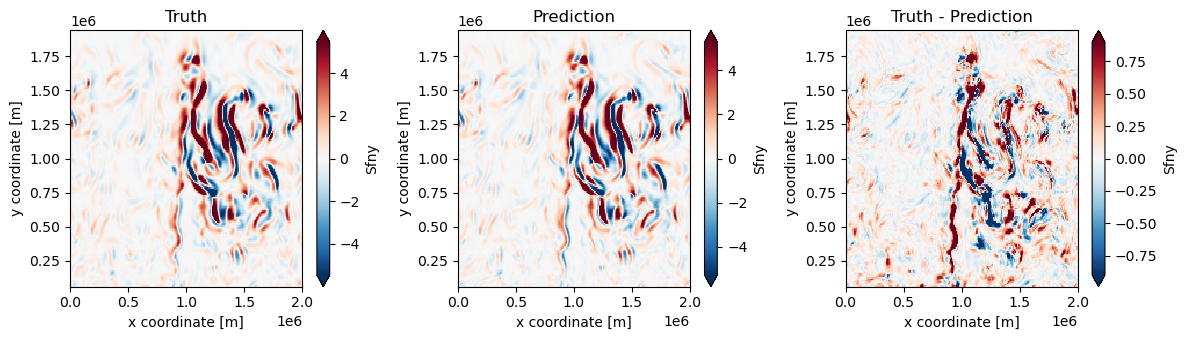

In [12]:
MG100.horz_snapshot_plot(Tlev=-5)

In [13]:
R2 = MG100.calc_R2()

In [14]:
corr = MG100.calc_corr()

In [15]:
R2.values

array(0.95621735, dtype=float32)

In [16]:
corr.values

array(0.97785138)

In [17]:
R2 = MG100.calc_R2('Sfny', ['time','YC'])

In [18]:
corr = MG100.calc_corr('Sfny', ['time','YC'])

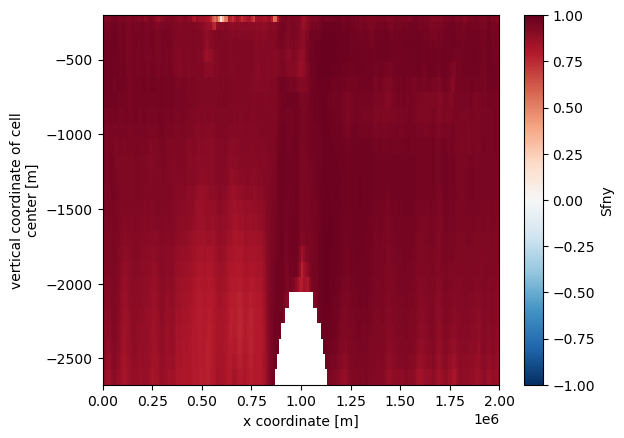

In [19]:
R2.plot(vmin=-1)

/srv/conda/envs/notebook/lib/python3.10/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


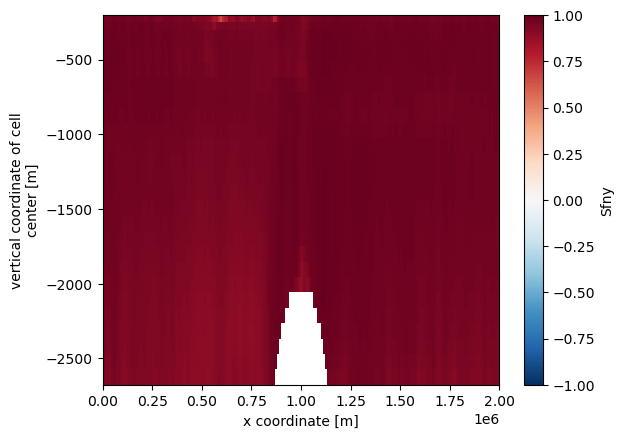

In [20]:
corr.plot(vmin=-1)

In [21]:
true_ps, pred_ps, anom_ps = MG100.zonal_PS(var='Sfny')


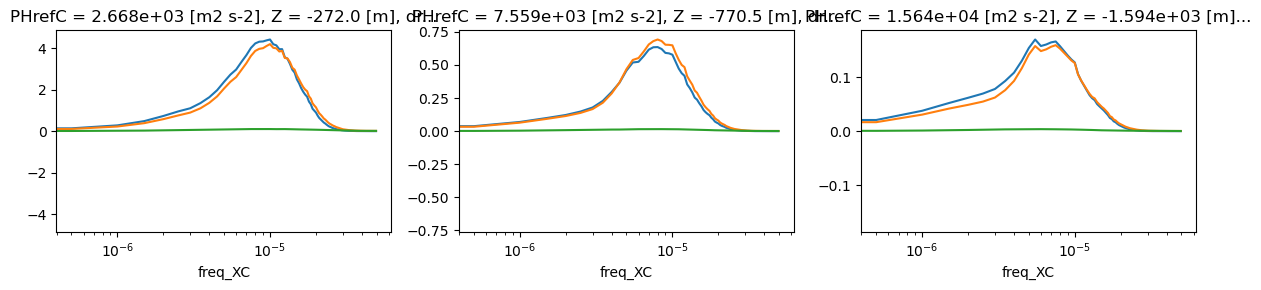

In [22]:
plt.figure(figsize=(12, 3)) 

plt.subplot(131)
(true_ps * true_ps.freq_XC).isel(Z=1).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=1).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=1).plot()
plt.xscale('log')

plt.subplot(132)
(true_ps * true_ps.freq_XC).isel(Z=7).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=7).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=7).plot()
plt.xscale('log')

plt.subplot(133)
(true_ps * true_ps.freq_XC).isel(Z=15).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=15).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=15).plot()
plt.xscale('log')

plt.tight_layout()

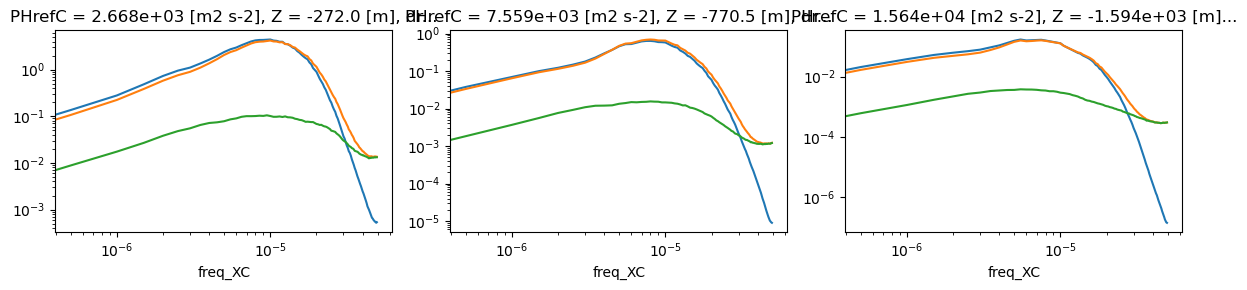

In [23]:
plt.figure(figsize=(12, 3)) 

plt.subplot(131)
(true_ps * true_ps.freq_XC).isel(Z=1).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=1).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=1).plot()
plt.yscale('log')
plt.xscale('log')

plt.subplot(132)
(true_ps * true_ps.freq_XC).isel(Z=7).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=7).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=7).plot()
plt.yscale('log')
plt.xscale('log')

plt.subplot(133)
(true_ps * true_ps.freq_XC).isel(Z=15).plot()
(pred_ps * pred_ps.freq_XC).isel(Z=15).plot()
(anom_ps * anom_ps.freq_XC).isel(Z=15).plot()
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()

In [24]:
true_OT, pred_OT, anom_OT = MG100.zonal_avg_OT(var='Sfny')

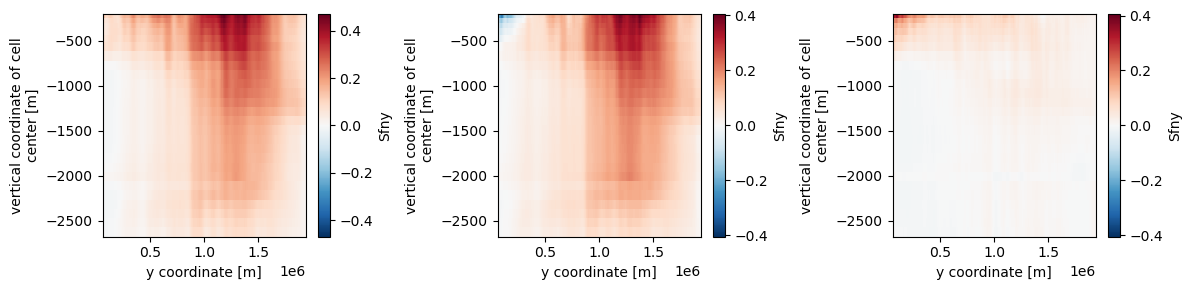

In [26]:
plt.figure(figsize=(12, 3)) 

plt.subplot(131)
true_OT.plot()
#plt.xscale('log')

plt.subplot(132)
pred_OT.plot()
#plt.xscale('log')

plt.subplot(133)
anom_OT.plot()
#plt.xscale('log')

plt.tight_layout()